In [3]:
pip install rdkit-pypi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn.preprocessing import OneHotEncoder


df=pd.read_csv("boilingpoints.csv")
df=df.dropna(how="all")
df=df.iloc[:,:3]
df["Nomenclature Name"]=df.iloc[:,2]
df["Molecular Structure"]=df.iloc[:,1]
df["CMC"]=df.iloc[:,0]
df=df[["Nomenclature Name","Molecular Structure","CMC"]]
df.tail(10)

,Nomenclature Name,Molecular Structure,CMC
59,A,C=CC(=C)C=C-C=C-C=CCCCCSSSNSOCOCOCSSSCCC,1261.0
60,A,C=CC(=C)C=C-C=C-C=CCCCCSSSNSOCOCOCSSSCCCSSS,1462.0
61,A,C=CC(=C)C=C-C=C,376.0
62,A,C=CC(=C)C=C-C=C-S,447.0
63,A,C=CC(=C)C=C-C=C-S-S,515.0
64,A,C=CC(=C)C=C-C=C-S-S-CCCO,682.0
65,A,C=CC(=C)C=C-C=C-S-S-CCCOCCC,681.0
66,A,C=CC(=C)C=C-C=C-S-S-CCCOCCCOOO,818.0
67,A,C=CC(=C)C=C-C=C-S-S-CCCOCCCOOOCCC,817.0
68,A,C=CC(=C)C=N,391.0


In [5]:
def encoding(df):
  encoded=[]
  elements=[['c'], ['n'], ['o'], ['C'], ['N'], ['F'], ['='], ['O'], 
            ['('], [')'], ['1'],['2'],['#'],['Cl'],['/']]
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(elements)
  enc.categories_
  df1=df["Molecular Structure"].apply(lambda x: pd.Series(list(x)))
  for i in range(df1.shape[0]):
    x=enc.transform(pd.DataFrame(df1.iloc[i,:]).dropna(how="all").values).toarray()
    y=np.zeros(((df1.shape[1]-x.shape[0]),len(elements)))
    encoded.append(np.vstack((x,y)))
  return encoded

def encoded_generate_images(df):
  listt=encoding(df)
  plt.figure(figsize=(20,100))
  for i in range(len(listt)):
    plt.subplot(len(listt),5,i+1)
    plt.imshow(listt[i])

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Conv1D,Flatten,MaxPooling1D
from keras import optimizers
from keras.layers import Dropout

In [7]:
X=encoding(df)
X=np.array(X)
X.shape

(69, 43, 15)

In [8]:
Y=df["CMC"].values
Y.shape

(69,)

In [9]:
import tensorflow as tf

In [10]:
from keras import optimizers


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

  


In [ ]:

def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=8, activation='relu',kernel_regularizer="l2", input_shape=(43, 15)))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(hp.Choice('units', [30, 50]), activation='relu'))
    model.add(Dense(1))
    optimizer=tf.keras.optimizers.Adam(lr=0.005)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy'])
    Model=model.fit(x=X_train,y=y_train,epochs=10,batch_size=16,validation_split=0.2)
    return model

In [24]:
my_list = ['10', '20', '30', '40', '50', '60']
list2=['0.001','0.002','0.003','0.004','0.005','0.006']
int(my_list[1])
float(list2[2])

0.003

In [36]:
result_t = []
K=[]
K2=[]

for k in range(1,5):
    for S in range (1,5):

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
        model = Sequential()
        model.add(Conv1D(filters=128, kernel_size=8, activation='relu',kernel_regularizer="l2", input_shape=(43, 15)))
        model.add(MaxPooling1D(pool_size=5))
        model.add(Dropout(0.1))
        model.add(Flatten())
        model.add(Dense(int(my_list[k]), activation='relu'))
        model.add(Dense(1))
        optimizer=tf.keras.optimizers.Adam(lr=float(list2[S]))
        model.compile(optimizer=optimizer, loss='mean_absolute_error')
        Model=model.fit(x=X_train,y=y_train,epochs=50,batch_size=16,validation_split=0.2)
        y_predtrain=model.predict(X_train)
        MAE_train=abs(y_predtrain.reshape(y_train.shape)-y_train).sum()/y_train.shape
        result_t += [(MAE_train,int(my_list[k]),float(list2[k]))]
        K += [int(my_list[k])]
        K2 += [float(list2[k])]
result_t

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 3s 119ms/step - loss: 608.3292 - val_loss: 597.7756
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 606.4567 - val_loss: 595.3995
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 603.7203 - val_loss: 591.8183
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 599.6490 - val_loss: 586.5344
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 593.7806 - val_loss: 579.0072
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 585.3709 - val_loss: 568.6765
Epoch 7/50
4/4 [==============================] - 0s 24ms/step - loss: 574.2093 - val_loss: 554.9594
Epoch 8/50
4/4 [==============================] - 0s 27ms/step - loss: 558.9996 - val_loss: 537.2877
Epoch 9/50
4/4 [==============================] - 0s 27ms/step - loss: 539.6916 - val_loss: 514.8982
Epoch 10/50
4/4 [==============================] - 0s 21ms/step - loss: 516.4711 - val_loss: 487.2023

[(array([68.11287291]), 20, 0.002),
 (array([53.00211231]), 20, 0.002),
 (array([48.68593002]), 20, 0.002),
 (array([42.07721705]), 20, 0.002),
 (array([61.00079735]), 30, 0.003),
 (array([49.74833084]), 30, 0.003),
 (array([47.89834122]), 30, 0.003),
 (array([46.83685322]), 30, 0.003),
 (array([57.63814318]), 40, 0.004),
 (array([49.41294881]), 40, 0.004),
 (array([48.69791998]), 40, 0.004),
 (array([40.38931196]), 40, 0.004),
 (array([59.24680176]), 50, 0.005),
 (array([49.34886927]), 50, 0.005),
 (array([48.69729339]), 50, 0.005),
 (array([40.57797655]), 50, 0.005)]

In [28]:
result_t

[array([73.86295968]),
 array([61.13738974]),
 array([48.18553674]),
 array([50.23683186]),
 array([66.40783194]),
 array([52.93475534]),
 array([46.45021175]),
 array([47.18095885]),
 array([69.78309725]),
 array([55.02774461]),
 array([58.70143009]),
 array([41.95299771]),
 array([60.82706766]),
 array([50.79654787]),
 array([46.60914681]),
 array([43.62713121])]

In [135]:
mean_squared_error(x=X_train,y=y_train)

'mean_absolute_error'

In [123]:

print(history.params)
# check the keys of history object
print(history.history.keys())


{'verbose': 1, 'epochs': 10, 'steps': 1}
dict_keys(['loss'])


In [133]:
print(model.history)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 36, 128)           15488     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 128)            0         
                                                                 
 flatten_4 (Flatten)         (None, 896)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                44850     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                      

In [ ]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
MAE_test=abs(y_predtest.reshape(y_test.shape)-y_test).sum()/y_test.shape
MAE_train=abs(y_predtrain.reshape(y_train.shape)-y_train).sum()/y_train.shape
print("Mean Absolute Error on Training Set = ",MAE_train.item())
print("Mean Absolute Error on Test Set = ",MAE_test.item())

Mean Absolute Error on Training Set =  58.3032469718687
Mean Absolute Error on Test Set =  65.0591561453683


(7,)

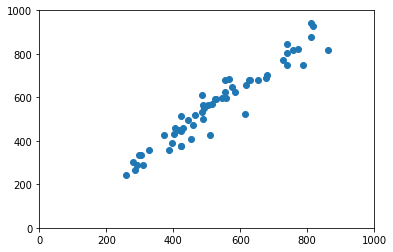

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_predtrain,y_train.reshape(62,1))
plt.xlim([0,1000])
plt.ylim([0,1000])
y_train.shape
y_test.shape

In [ ]:
pip install -q -U keras-tuner


In [ ]:
import keras_tuner as kt


In [ ]:
tuner = kt.RandomSearch(
    build_model,
        max_trials=4,   
    directory='keras_tuner_dir1s',
    project_name='keras')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 237ms/step - loss: 606.5396 - accuracy: 0.0000e+00 - val_loss: 588.7385 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 49ms/step - loss: 592.8971 - accuracy: 0.0000e+00 - val_loss: 564.2092 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 62ms/step - loss: 562.5708 - accuracy: 0.0000e+00 - val_loss: 517.3839 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 71ms/step - loss: 507.4066 - accuracy: 0.0000e+00 - val_loss: 439.5171 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 69ms/step - loss: 416.8166 - accuracy: 0.0000e+00 - val_loss: 321.5225 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 48ms/step - loss: 285.1955 - accuracy: 0.0000e+00 - val_loss: 153.1477 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 32ms/step - loss: 133.6569 - accuracy: 0.0000e+00 -

In [ ]:
tuner.search(x=X_train,y=y_train, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_model = tuner.get_best_models()[0]



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
50                |?                 |units

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 74ms/step - loss: 607.0784 - accuracy: 0.0000e+00 - val_loss: 590.7965 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 15ms/step - loss: 595.2107 - accuracy: 0.0000e+00 - val_loss: 568.8766 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 568.2299 - accuracy: 0.0000e+00 - val_loss: 526.1843 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 518.1679 - accuracy: 0.0000e+00 - val_loss: 453.9980 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 434.1579 - accuracy: 0.0000e+00 - val_loss: 342.1698 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 308.5249 - accuracy: 0.0000e+00 - val_loss: 177.6768 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 146.5512 - accuracy: 0.0000e+00 - 

TypeError: ignored

In [ ]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 128)           15488     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 128)            0         
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 30)                26910     
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                        

In [ ]:
Model=best_model .fit(x=X_train,y=y_train,epochs=50,batch_size=16,validation_split=0.2)


Epoch 1/50
4/4 [==============================] - 0s 42ms/step - loss: 153.6794 - accuracy: 0.0000e+00 - val_loss: 156.9438 - val_accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 113.3909 - accuracy: 0.0000e+00 - val_loss: 126.5211 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 100.6229 - accuracy: 0.0000e+00 - val_loss: 134.4518 - val_accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 136.1806 - accuracy: 0.0000e+00 - val_loss: 148.6976 - val_accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 135.2037 - accuracy: 0.0000e+00 - val_loss: 127.9621 - val_accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 103.4551 - accuracy: 0.0000e+00 - val_loss: 118.0461 - val_accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 90.7563 - accuracy: 0.0

In [ ]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
MAE_test=abs(y_predtest.reshape(y_test.shape)-y_test).sum()/y_test.shape
MAE_train=abs(y_predtrain.reshape(y_train.shape)-y_train).sum()/y_train.shape
print("Mean Absolute Error on Training Set = ",MAE_train.item())
print("Mean Absolute Error on Test Set = ",MAE_test.item())

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_predtrain,y_train.reshape(62,1))
plt.xlim([0,1000])
plt.ylim([0,1000])
y_train.shape
y_test.shape


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(Model.history["loss"],color='r', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='b',
         markeredgecolor='black',
         markeredgewidth=1,label="Training Loss")
plt.plot(Model.history['val_loss'],color='black', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='brown',
         markeredgecolor='black',
         markeredgewidth=1,label="Validation Loss")
plt.xlabel("Number of Epochs",size=20,color="black")
plt.ylabel("Loss",size=20,color="black")
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Mean Absolute Error vs Number of Epochs",size=20)
plt.legend()
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn.preprocessing import OneHotEncoder


df=pd.read_csv("boilingpointest (1).csv")
df=df.dropna(how="all")
df=df.iloc[:,:3]
df["Nomenclature Name"]=df.iloc[:,2]
df["Molecular Structure"]=df.iloc[:,1]
df["CMC"]=df.iloc[:,0]
df=df[["Nomenclature Name","Molecular Structure","CMC"]]
df.head(10)

In [ ]:
X=encoding(df)
X=np.array(X)
X.shape

In [ ]:
y_predtrain=model.predict(X)

In [ ]:
y_predtrain

### Neural Network using Bond Features

In [ ]:
mw={"C":12,"c":12,"O":16,"o":16,"N":14,"F":19}
def Molecular_Weight(text):
  Mass=[]
  for elements in text:
    if elements=="C":
      Mass.append(mw[elements])
    elif elements=="c":
      Mass.append(mw[elements])
    elif elements=="o":
      Mass.append(mw[elements])
    elif elements=="O":
      Mass.append(mw[elements])
    elif elements=="F":
      Mass.append(mw[elements])
    elif elements=="N":
      Mass.append(mw[elements])  
  return sum(Mass)

In [ ]:
df["C_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c'))
df["C_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('C'))
df["O_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('O'))
df["O_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('o'))
df["N_Double Bonds_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c')/2)
df["N_Double Bonds_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('='))
df["Nitrogen_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('N'))
df["F_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('F'))
df["MW"]=df["Molecular Structure"].apply(lambda x: Molecular_Weight(x))
df["Total Number of Atoms"]=df["Molecular Structure"].apply(lambda x: len(x))
df["Number of Single Bonds"]=df["Molecular Structure"].apply(lambda x:len(x)-x.count('=')-1)

In [ ]:
df.head()

In [ ]:
X=df.loc[:,"MW":]
Y=df[["CMC"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(Dense(40, input_dim=3, activation="relu",kernel_regularizer="l2"))
#model.add(Dense(20,activation="relu",kernel_regularizer="l2"))
model.add(Dense(10,activation="relu",kernel_regularizer="l2"))
#model.add(Dense(12, activation="relu",kernel_regularizer="l2"))
model.add(Dense(1))

In [ ]:
model.summary()

In [ ]:
optimizer=tf.keras.optimizers.Adam(lr=0.09)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=50,batch_size=64,validation_split=0.1)
  

In [ ]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
print("Train Error = ",abs(y_predtrain.reshape(55)-y_train.values.reshape(55)).sum()/55)
print("Unseen Test Error = ",abs(y_predtest.reshape(14)-y_test.values.reshape(14)).sum()/14)

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtrain.reshape(55),
    y = y_train.values.reshape(55),
    mode='markers',
    marker=dict(
        color=np.random.randn(14),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtest.reshape(14),
    y = y_test.values.reshape(14),
    mode='markers',
    marker=dict(
        color=np.random.randn(55),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

In [ ]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['Nevirapine', 'CTAB', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant']

for ids in identifiers :
    print(ids, CIRconvert(ids))

In [ ]:
filename = open("inif.txt", "r")

for line in filename :
    event = line
    compounds = pcp.get_compounds(event, namespace='smiles') 
    match = compounds[0]
    print(i,'$$$','the CID is',compounds,'$$$','The IUPAC name is',match.iupac_name,'$$$','for the SMILE',event)
    i+=1